# Model Reproducibility

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.
The test is explained in the ReadMe File

In [80]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

import warnings

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.manifold import TSNE
from prettytable import PrettyTable
from rdkit import Chem, DataStructs
from rdkit import DataStructs
from rdkit.Chem import AllChem

In [82]:
# Specify file path
input_test1_file = "../data/external_test_set_pos_I.csv"
input_pred1_file = "../data/pred_test_external_stack_pos_pred_file.csv"

input_test2_file = "../data/external_test_set_neg_II.csv"
input_pred2_file = "../data/pred_test_external_stack_neg_pred_file.csv"


input_test3_file = "../data/external_test_set_new_III.csv"
input_pred3_file = "../data/pred_test_external_stack_new_pred_file.csv"

# Read from CSV
input_test1 = pd.read_csv(input_test1_file, header=0, usecols=[0])
input_pred1 = pd.read_csv(input_pred1_file, header=None, usecols=[1])

input_test2 = pd.read_csv(input_test2_file, header=0, usecols=[0])
input_pred2 = pd.read_csv(input_pred2_file, header=None, usecols=[1])

input_test3 = pd.read_csv(input_test3_file, header=0, usecols=[0])
input_pred3 = pd.read_csv(input_pred3_file, header=None, usecols=[1])

In [83]:
# Extract the rows into a list for test set1
test1_rows = input_test1.squeeze().tolist()
pred1_rows = input_pred1.squeeze().tolist()
pred1_array = np.array([float(value.strip("[]")) for value in pred1_rows])
pred1_list = np.where(pred1_array > 0.5, 1, 0).tolist()


# Evaluate model using metrics below
auc_test_external_stack_pos = roc_auc_score(test1_rows, pred1_array)

tn, fp, fn, tp = confusion_matrix(test1_rows, pred1_list).ravel()
specificity_test_external_stack_pos = tn / (tn + fp)
sensitivity_test_external_stack_pos = tp / (tp + fn)
NPV_test_external_stack_pos = tn / (tn + fn)
PPV_test_external_stack_pos = tp / (tp + fp)

Accuracy_test_external_stack_pos = balanced_accuracy_score(test1_rows, pred1_list)
MCC_test_external_stack_pos = matthews_corrcoef(test1_rows, pred1_list)

In [84]:
# Extract the rows into a list for test set2
test2_rows = input_test2.squeeze().tolist()
pred2_rows = input_pred2.squeeze().tolist()
pred2_array = np.array([float(value1.strip("[]")) for value1 in pred2_rows])
pred2_list = np.where(pred2_array > 0.5, 1, 0).tolist()


# Evaluate model using metrics below
auc_test_external_stack_neg = roc_auc_score(test2_rows, pred2_array)

tn, fp, fn, tp = confusion_matrix(test2_rows, pred2_list).ravel()
specificity_test_external_stack_neg = tn / (tn + fp)
sensitivity_test_external_stack_neg = tp / (tp + fn)
NPV_test_external_stack_neg = tn / (tn + fn)
PPV_test_external_stack_neg = tp / (tp + fp)

Accuracy_test_external_stack_neg = balanced_accuracy_score(test2_rows, pred2_list)
MCC_test_external_stack_neg = matthews_corrcoef(test2_rows, pred2_list)

In [85]:
# Extract the rows into a list for test set3
test3_rows = input_test3.squeeze().tolist()
pred3_rows = input_pred3.squeeze().tolist()
pred3_array = np.array([float(value3.strip("[]")) for value3 in pred3_rows])
pred3_list = np.where(pred3_array > 0.5, 1, 0).tolist()


# Evaluate model using metrics below
auc_test_external_stack_new = roc_auc_score(test3_rows, pred3_array)

tn, fp, fn, tp = confusion_matrix(test3_rows, pred3_list).ravel()
specificity_test_external_stack_new = tn / (tn + fp)
sensitivity_test_external_stack_new = tp / (tp + fn)
NPV_test_external_stack_new = tn / (tn + fn)
PPV_test_external_stack_new = tp / (tp + fp)

Accuracy_test_external_stack_new = balanced_accuracy_score(test3_rows, pred3_list)
MCC_test_external_stack_new = matthews_corrcoef(test3_rows, pred3_list)

In [86]:
# Creat table to put in metric values
metric_table = PrettyTable(["Evaluation data", "Method", "MCC", "NPV", "ACC", "PPV", "SPE", "SEN", "B-ACC"])

metric_data = [("Test set-I", "Cardiotox", round(MCC_test_external_stack_pos, 3), round(NPV_test_external_stack_pos, 3), round(Accuracy_test_external_stack_pos, 3), round(PPV_test_external_stack_pos, 3), round(specificity_test_external_stack_pos, 3), round(sensitivity_test_external_stack_pos, 3), round(Accuracy_test_external_stack_pos, 3)), 
              ("Test set-II", "Cardiotox", round(MCC_test_external_stack_neg, 3), round(NPV_test_external_stack_neg, 3), round(Accuracy_test_external_stack_neg, 3), round(PPV_test_external_stack_neg, 3), round(specificity_test_external_stack_neg, 3), round(sensitivity_test_external_stack_neg, 3), round(Accuracy_test_external_stack_neg, 3)),
              ("Test set-III", "Cardiotox", round(MCC_test_external_stack_new, 3), round(NPV_test_external_stack_new, 3), round(Accuracy_test_external_stack_new, 3), round(PPV_test_external_stack_new, 3), round(specificity_test_external_stack_new, 3), round(sensitivity_test_external_stack_new, 3), round(Accuracy_test_external_stack_new, 3))]

# Add the calculated values to the table created
metric_table.add_rows(metric_data)

print("A table replicating the metric value on the three test dataset used in the publication")

# Print out the table
print(metric_table)

A table replicating the metric value on the three test dataset used in the publication
+-----------------+-----------+-------+-------+-------+-------+-------+-------+-------+
| Evaluation data |   Method  |  MCC  |  NPV  |  ACC  |  PPV  |  SPE  |  SEN  | B-ACC |
+-----------------+-----------+-------+-------+-------+-------+-------+-------+-------+
|    Test set-I   | Cardiotox | 0.599 | 0.688 |  0.81 | 0.893 | 0.786 | 0.833 |  0.81 |
|   Test set-II   | Cardiotox | 0.452 | 0.947 | 0.755 | 0.455 |  0.6  | 0.909 | 0.755 |
|   Test set-III  | Cardiotox |  0.22 | 0.986 | 0.746 | 0.112 | 0.698 | 0.794 | 0.746 |
+-----------------+-----------+-------+-------+-------+-------+-------+-------+-------+


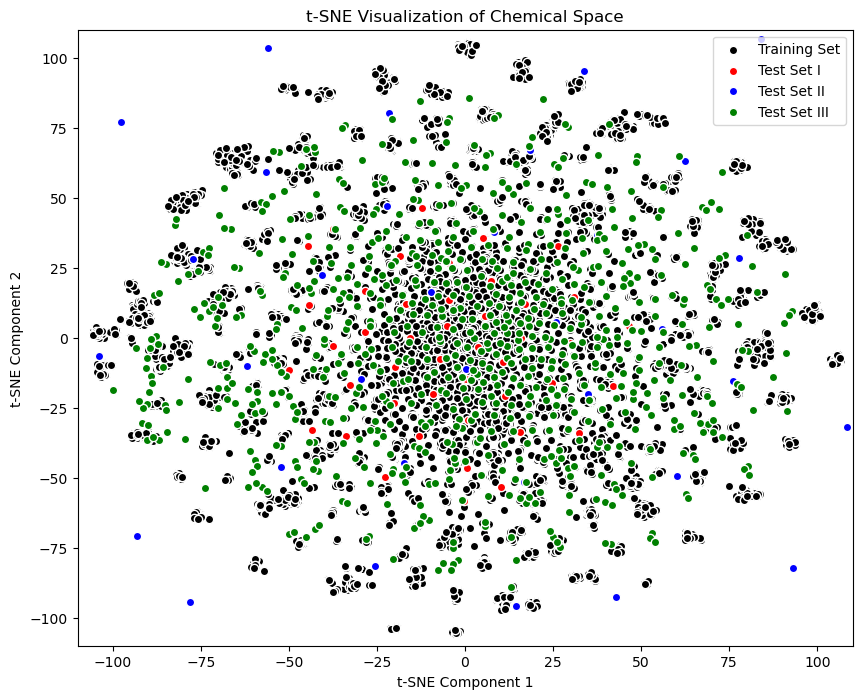

In [89]:
# Ignore specific warning by category
warnings.filterwarnings("ignore", category=FutureWarning)


# Extract Training set
input_train_file = "../data/train_validation_cardio_tox_data.csv"
input_train = pd.read_csv(input_train_file, header=0, usecols=[1])
train_rows = input_train.squeeze().tolist()

# Extract Test set1
input_test_1_file = "../data/external_test_set_pos_I.csv"
input_test_1 = pd.read_csv(input_test_1_file, header=0, usecols=[1])
test_1_rows = input_test_1.squeeze().tolist()

# Extract Test set2
input_test_2_file = "../data/external_test_set_neg_II.csv"
input_test_2 = pd.read_csv(input_test_2_file, header=0, usecols=[1])
test_2_rows = input_test_2.squeeze().tolist()

# Extract Test set3
input_test_3_file = "../data/external_test_set_new_III.csv"
input_test_3 = pd.read_csv(input_test_3_file, header=0, usecols=[1])
test_3_rows = input_test_3.squeeze().tolist()


# Calculate fingerprints
molecules_train = [Chem.MolFromSmiles(smiles) for smiles in train_rows]
fingerprints_train = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in molecules_train]
fingerprints_array_train = np.array([list(fp) for fp in fingerprints_train])

molecules_test_1 = [Chem.MolFromSmiles(smiles1) for smiles1 in test_1_rows]
fingerprints_test_1 = [AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048) for mol1 in molecules_test_1]
fingerprints_array_test_1 = np.array([list(fp1) for fp1 in fingerprints_test_1])

molecules_test_2 = [Chem.MolFromSmiles(smiles2) for smiles2 in test_2_rows]
fingerprints_test_2 = [AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048) for mol2 in molecules_test_2]
fingerprints_array_test_2 = np.array([list(fp2) for fp2 in fingerprints_test_2])

molecules_test_3 = [Chem.MolFromSmiles(smiles3) for smiles3 in test_3_rows]
fingerprints_test_3 = [AllChem.GetMorganFingerprintAsBitVect(mol3, 2, nBits=2048) for mol3 in molecules_test_3]
fingerprints_array_test_3 = np.array([list(fp3) for fp3 in fingerprints_test_3])


# Apply t-SNE to all datatset
tsne = TSNE(n_components=2, random_state=42)
tsne_result_train = tsne.fit_transform(fingerprints_array_train)
tsne_result_test_1 = tsne.fit_transform(fingerprints_array_test_1)
tsne_result_test_2 = tsne.fit_transform(fingerprints_array_test_2)
tsne_result_test_3 = tsne.fit_transform(fingerprints_array_test_3)


# Plot t-SNE components
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result_train[:, 0], tsne_result_train[:, 1], c='black', marker='o', edgecolor='white', label='Training Set')
plt.scatter(tsne_result_test_1[:, 0], tsne_result_test_1[:, 1], c='red', marker='o', edgecolor='white', label='Test Set I')

# Plot test sets 2 and 3 if available
plt.scatter(tsne_result_test_2[:, 0], tsne_result_test_2[:, 1], c='blue', marker='o', edgecolor='white', label='Test Set II')
plt.scatter(tsne_result_test_3[:, 0], tsne_result_test_3[:, 1], c='green', marker='o', edgecolor='white', label='Test Set III')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.title('t-SNE Visualization of Chemical Space')
plt.legend()
plt.show()

In [90]:
# Tanimoto Similarity
test1_vs_train_similarity = []
test2_vs_train_similarity = []
test3_vs_train_similarity = []

test1_vs_test2_similarity = []
test1_vs_test3_similarity = []
test3_vs_test2_similarity = []


# Loop to calculate pairwise similarity
for fp in fingerprints_train:
    for fp1 in fingerprints_test_1:
        t_similarity = DataStructs.TanimotoSimilarity(fp, fp1)
        test1_vs_train_similarity.append(t_similarity)
        
for fp in fingerprints_train:
    for fp2 in fingerprints_test_2:
        t_similarity = DataStructs.TanimotoSimilarity(fp, fp2)
        test2_vs_train_similarity.append(t_similarity)
        
for fp in fingerprints_train:
    for fp3 in fingerprints_test_3:
        t_similarity = DataStructs.TanimotoSimilarity(fp, fp3)
        test3_vs_train_similarity.append(t_similarity)
        
for fp1 in fingerprints_test_1:
    for fp2 in fingerprints_test_2:
        t_similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
        test1_vs_test2_similarity.append(t_similarity)
        
for fp1 in fingerprints_test_1:
    for fp3 in fingerprints_test_3:
        t_similarity = DataStructs.TanimotoSimilarity(fp1, fp3)
        test1_vs_test3_similarity.append(t_similarity)
        
for fp3 in fingerprints_test_3:
    for fp2 in fingerprints_test_2:
        t_similarity = DataStructs.TanimotoSimilarity(fp3, fp2)
        test3_vs_test2_similarity.append(t_similarity)

Text(0, 0.5, 'Number of molecule pairs')

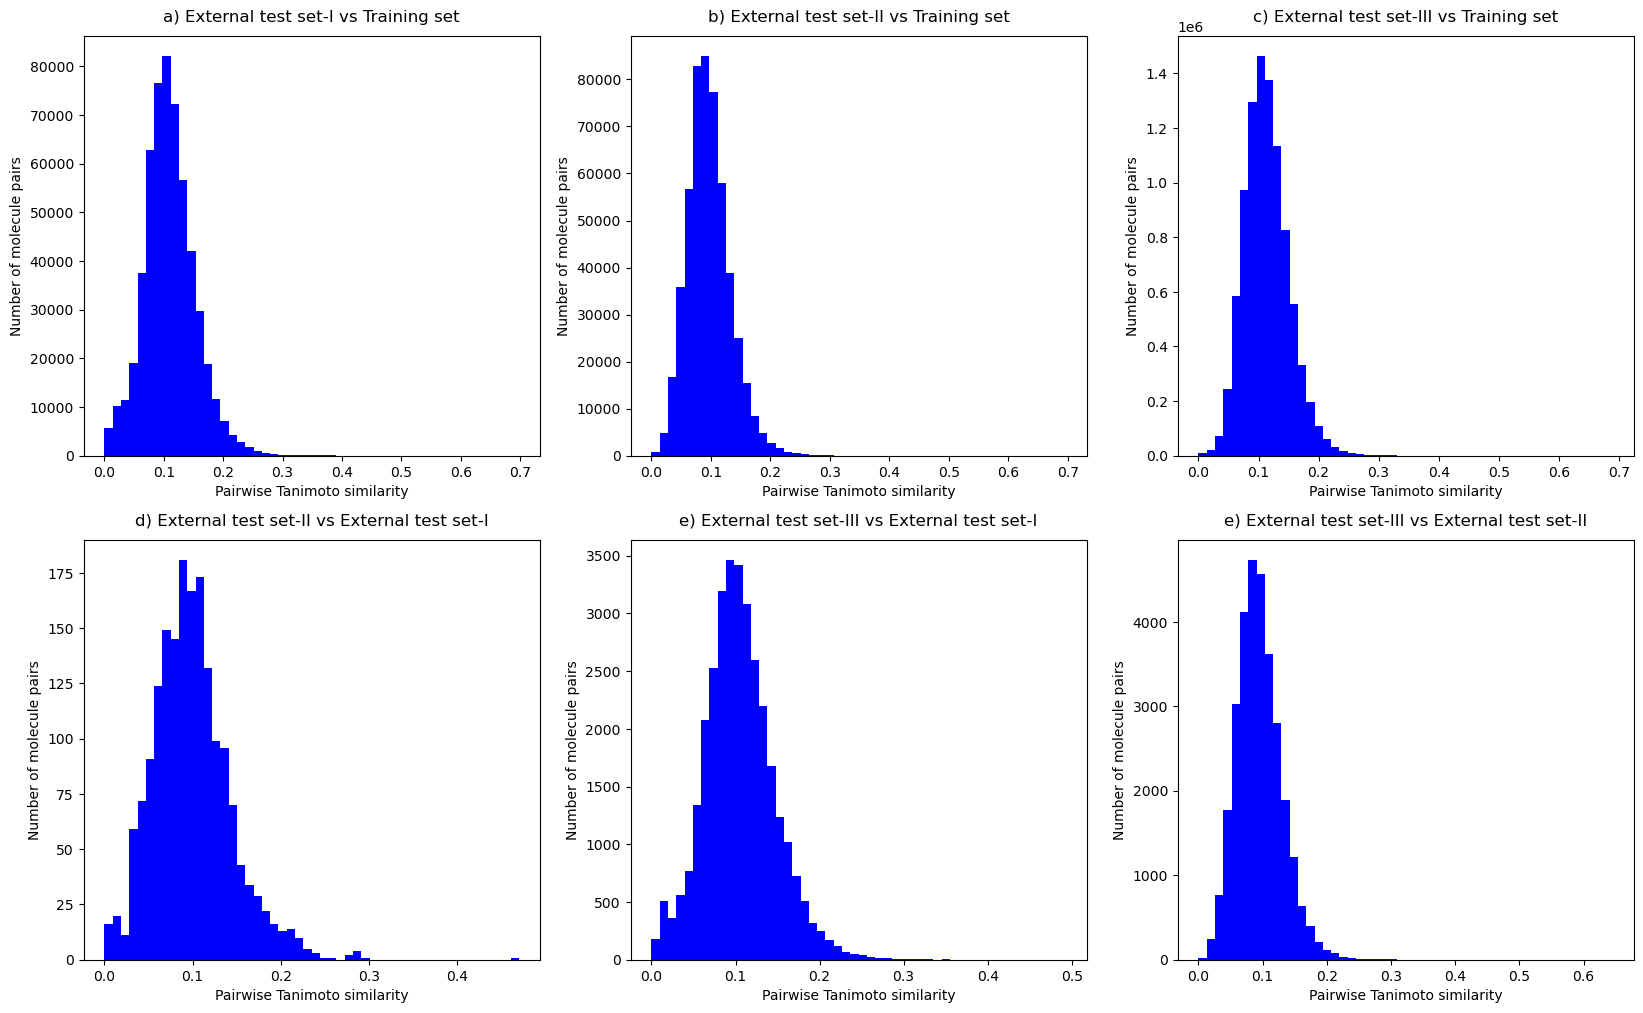

In [91]:
# plot similarity histogram
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.hist(test1_vs_train_similarity, bins=50, color='blue')
plt.title("a) External test set-I vs Training set", pad=10)
plt.xlabel("Pairwise Tanimoto similarity")
plt.ylabel("Number of molecule pairs")

plt.subplot(2, 3, 2)
plt.hist(test2_vs_train_similarity, bins=50, color='blue')
plt.title("b) External test set-II vs Training set", pad=10)
plt.xlabel("Pairwise Tanimoto similarity")
plt.ylabel("Number of molecule pairs")

plt.subplot(2, 3, 3)
plt.hist(test3_vs_train_similarity, bins=50, color='blue')
plt.title("c) External test set-III vs Training set", pad=10)
plt.xlabel("Pairwise Tanimoto similarity")
plt.ylabel("Number of molecule pairs")

plt.subplot(2, 3, 4)
plt.hist(test1_vs_test2_similarity, bins=50, color='blue')
plt.title("d) External test set-II vs External test set-I", pad=10)
plt.xlabel("Pairwise Tanimoto similarity")
plt.ylabel("Number of molecule pairs")

plt.subplot(2, 3, 5)
plt.hist(test1_vs_test3_similarity, bins=50, color='blue')
plt.title("e) External test set-III vs External test set-I", pad=10)
plt.xlabel("Pairwise Tanimoto similarity")
plt.ylabel("Number of molecule pairs")

plt.subplot(2, 3, 6)
plt.hist(test3_vs_test2_similarity, bins=50, color='blue')
plt.title("e) External test set-III vs External test set-II", pad=10)
plt.xlabel("Pairwise Tanimoto similarity")
plt.ylabel("Number of molecule pairs")

In [92]:
# In this codeblock I will load the predictions obtained from the Ersilia Model Hub implementation saved in the /data folder
EMH_test1_pred_file = "../data/eos2ta5_reprod_EH.csv"

In [93]:
# In this codeblock I will compare the orginal implementation vs the EMH result
EMH_test1_pred = pd.read_csv(EMH_test1_pred_file, header=0, usecols=[2])

# Extract the rows into a list
EMH_test1_pred_rows = EMH_test1_pred.squeeze().tolist()
EMH_test1_pred_array = np.array([float(value4) for value4 in EMH_test1_pred_rows])
EMH_test1_pred_list = np.where(EMH_test1_pred_array > 0.5, 1, 0).tolist()


# Calculate performance matric
auc_test_external_EMH = roc_auc_score(test1_rows, EMH_test1_pred_rows)

tn, fp, fn, tp = confusion_matrix(test1_rows, pred1_list).ravel()
specificity_test_external_EMH = tn / (tn + fp)
sensitivity_test_external_EMH = tp / (tp + fn)
NPV_test_external_EMH = tn / (tn + fn)
PPV_test_external_EMH = tp / (tp + fp)

Accuracy_test_external_EMH = balanced_accuracy_score(test1_rows, EMH_test1_pred_list)
MCC_test_external_EMH = matthews_corrcoef(test1_rows, EMH_test1_pred_list)


# Put values in a table
EMH_metric_table = PrettyTable(["Evaluation data", "Method", "MCC", "NPV", "ACC", "PPV", "SPE", "SEN", "B-ACC"])

EMH_metric_data = ["Test set-I", "eos2ta5", round(MCC_test_external_EMH, 3), round(NPV_test_external_EMH, 3), round(Accuracy_test_external_EMH, 3), round(PPV_test_external_EMH, 3), round(specificity_test_external_EMH, 3), round(sensitivity_test_external_EMH, 3), round(Accuracy_test_external_EMH, 3)]

# Add the calculated values to the table created
EMH_metric_table.add_row(EMH_metric_data)

print("A table replicating the metric value on test dataset I used in the publication using Ersilia Model Hub")

# Print out the table
print(EMH_metric_table)

A table replicating the metric value on test dataset I used in the publication using Ersilia Model Hub
+-----------------+---------+-------+-------+------+-------+-------+-------+-------+
| Evaluation data |  Method |  MCC  |  NPV  | ACC  |  PPV  |  SPE  |  SEN  | B-ACC |
+-----------------+---------+-------+-------+------+-------+-------+-------+-------+
|    Test set-I   | eos2ta5 | 0.599 | 0.688 | 0.81 | 0.893 | 0.786 | 0.833 |  0.81 |
+-----------------+---------+-------+-------+------+-------+-------+-------+-------+
